# seaborn

We will end our very broad discussion of data visualization with [seaborn](https://seaborn.pydata.org). `seaborn` is based on `matplotlib`, but us "higher-level" (i.e. easier to use) and makes what many consider nicer looking graphs (i.e. many = me). So, why didn't we start with `seaborn`? I think it is good to see `matplotlib`, since it is the most popular way to create figures in Python. But, you should take a look at `seaborn` as well.

`seaborn` comes with Anaconda, so there's nothing to install here. Just add `import seaborn as sns` to your set-up and you're ready to go. In my set-up, I'll set a theme, so that the same theme is used across all of my graphs. I'll create my returns directly in the **stocks** DataFrame.

DataCamp has a [seaborn tutorial](https://www.datacamp.com/community/tutorials/seaborn-python-tutorial) as well.

There's an [example gallery](https://seaborn.pydata.org/examples/index.html) as well.

You can find other examples [here](https://pythonforfinance.net/2018/07/22/seaborn-module-and-python-distribution-plots/).

Finally, I'm going to use the `df.var_name` convention for pulling out variables from a DataFrame. I find it easier than `df['var_name']`. I'll go back and forth in the notes, to get you use to the different styles.


In [1]:
# Set-up
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
sns.set_theme(style="white")

# Include this to have plots show up in your Jupyter notebook.
%matplotlib inline 

# Read in some eod prices
stocks = pd.read_csv('https://raw.githubusercontent.com/aaiken1/fin-data-analysis-python/main/data/tr_eikon_eod_data.csv',
                  index_col=0, parse_dates=True)  

stocks.dropna(inplace=True)  

from janitor import clean_names

stocks = clean_names(stocks)

stocks['aapl_ret'] = np.log(stocks.aapl_o / stocks.aapl_o.shift(1))  
stocks['msft_ret'] = np.log(stocks.msft_o / stocks.msft_o.shift(1))  

stocks.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2138 entries, 2010-01-04 to 2018-06-29
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   aapl_o    2138 non-null   float64
 1   msft_o    2138 non-null   float64
 2   intc_o    2138 non-null   float64
 3   amzn_o    2138 non-null   float64
 4   gs_n      2138 non-null   float64
 5   spy       2138 non-null   float64
 6   _spx      2138 non-null   float64
 7   _vix      2138 non-null   float64
 8   eur=      2138 non-null   float64
 9   xau=      2138 non-null   float64
 10  gdx       2138 non-null   float64
 11  gld       2138 non-null   float64
 12  aapl_ret  2137 non-null   float64
 13  msft_ret  2137 non-null   float64
dtypes: float64(14)
memory usage: 250.5 KB


Let's start with our line plot again. We'll plot just AAPL to start.

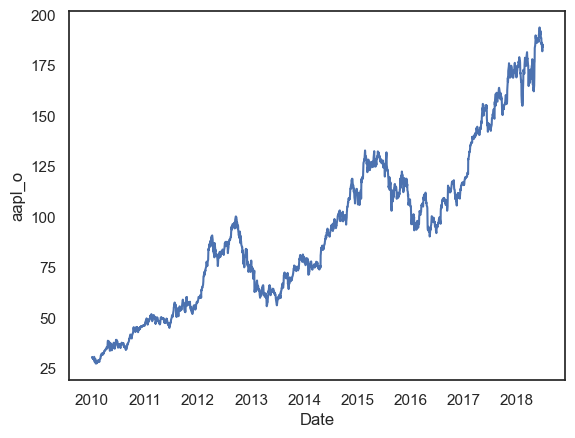

In [2]:
sns.lineplot(x=stocks.index, y=stocks.aapl_o)
plt.show();

We can also make a distribution, or histogram, as well. I'll add what's called the **kernel density estimate** (kde), which gives the distribution. We'll do more data work like this when thinking about **risk**.

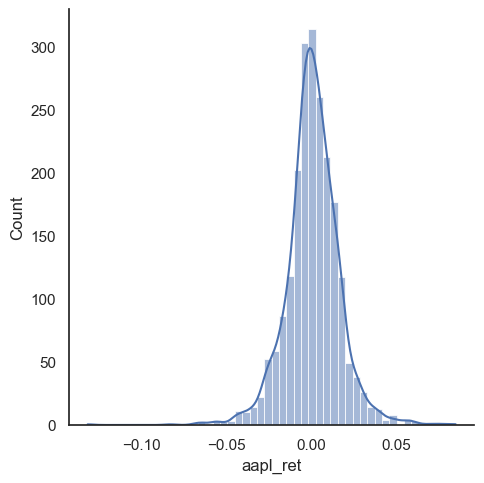

In [3]:
sns.displot(stocks.aapl_ret, kde=True, bins=50)
plt.show();

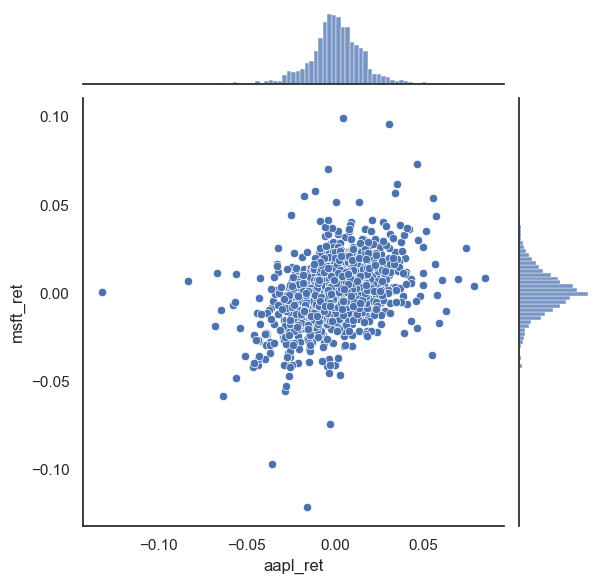

In [4]:
sns.jointplot(x=stocks.aapl_ret, y=stocks.msft_ret)
plt.show();

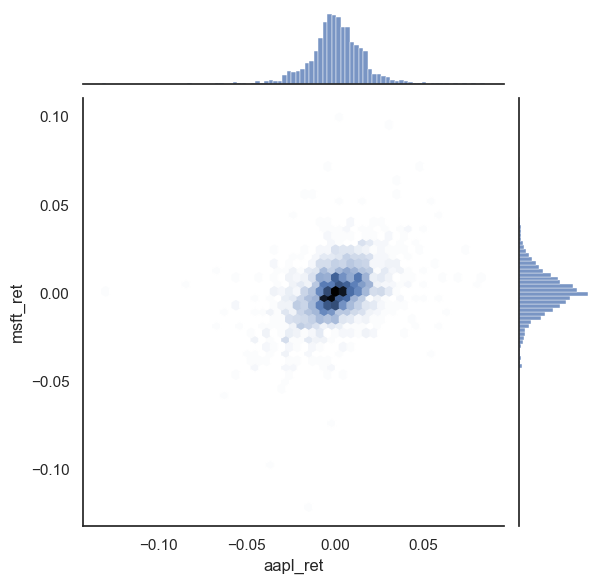

In [5]:
sns.jointplot(x=stocks.aapl_ret, y=stocks.msft_ret, kind='hex')
plt.show();